### 3. **Data Analysis and Exploration**
  - **Purpose**: Provides insights into the data, revealing patterns and relationships.
  - **Content**:
    - Visualize distributions of key variables (e.g., spending amounts, offer types).
    - Analyze relationships between demographics and offer responses.
    - Use visualizations to explore offer effectiveness (e.g., funnel metrics, response rates).
    - Summarize key findings and insights that emerge from the EDA.
---

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load the cleaned dataset
final_merged_data = pd.read_csv('../data/processed/merged_data.csv')

# Set style for seaborn plots
sns.set_theme(style="whitegrid")

## Visualize Distributions of Key Variables

Let's start by visualizing the distributions of key variables including a histogram of spending amounts to understand spending patterns, a bar chart showing the frequency of BOGO, Discount, and Informational offers, and a bar chart showing how often each channel (email, mobile, social, web) was used to deliver offers. These visualizations provide insights into customer engagement, offer distribution, and channel preferences.

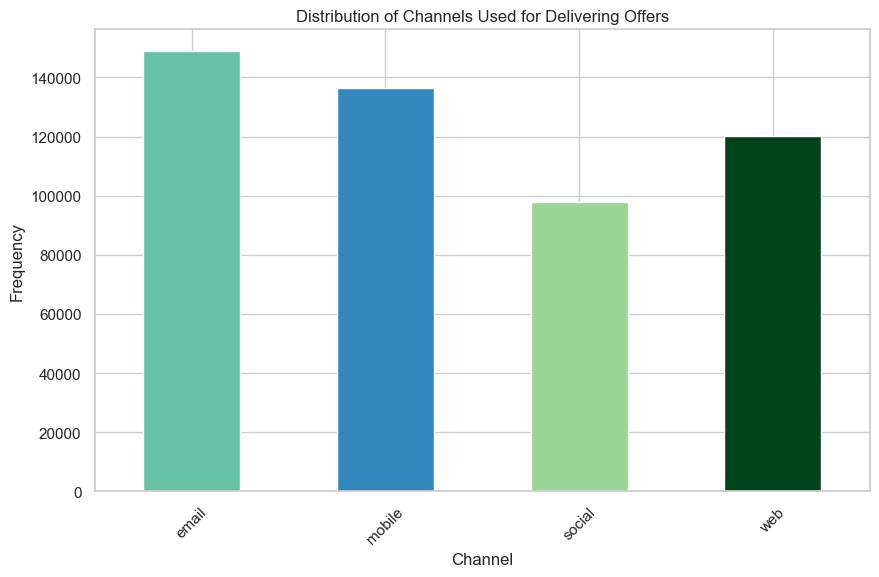

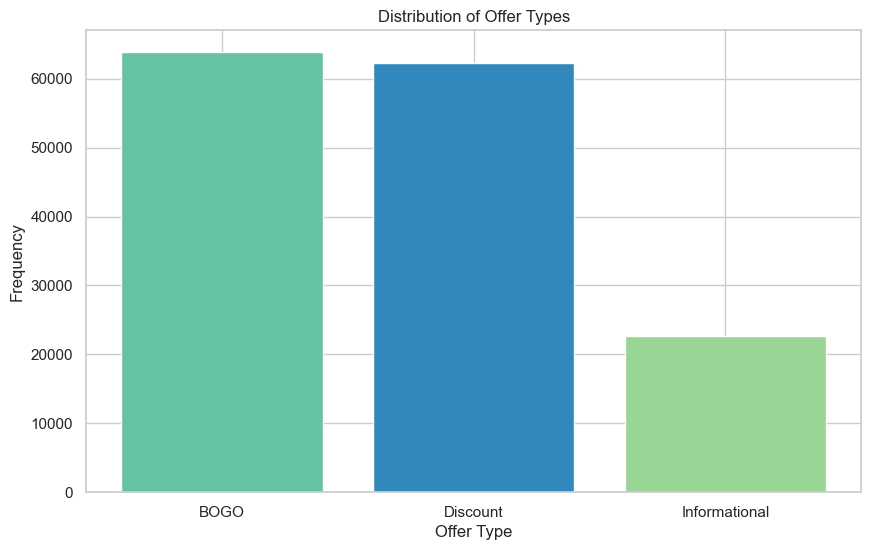

c:\Users\F88OAOA\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


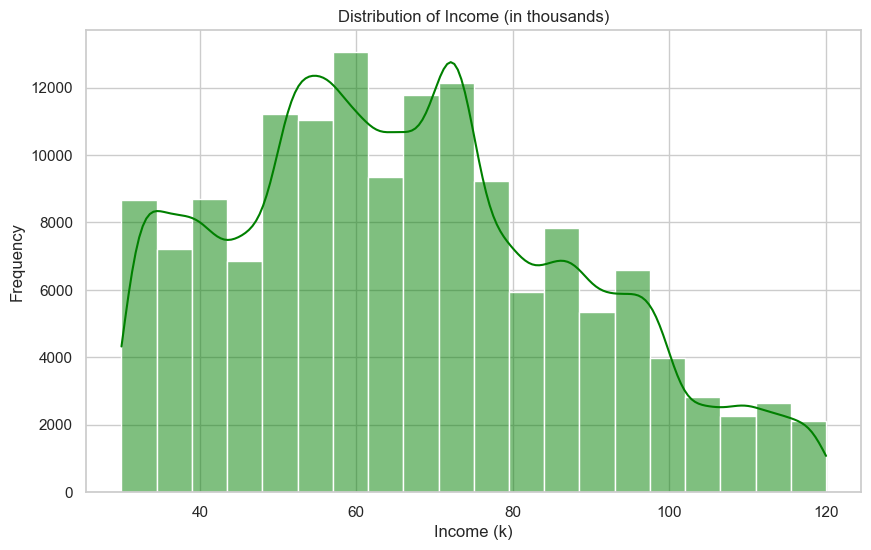

In [2]:
# Sum the occurrences for each channel
channel_columns = ['email', 'mobile', 'social', 'web']
channel_counts = final_merged_data[channel_columns].sum()

# Define a custom palette with green shades
green_palette = ["#66c2a5", "#3288bd", "#99d594", "#00441b", "#41ab5d"]

# Create a bar chart for the distribution of channels
plt.figure(figsize=(10, 6))
channel_counts.plot(kind='bar', color=green_palette)
plt.title('Distribution of Channels Used for Delivering Offers')
plt.xlabel('Channel')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Calculate the counts for each type of offer
bogo_count = final_merged_data['offer_type_bogo'].sum()
discount_count = final_merged_data['offer_type_discount'].sum()
informational_count = len(final_merged_data) - (bogo_count + discount_count)

# Create a bar chart for the distribution of offer types
plt.figure(figsize=(10, 6))
offer_counts = [bogo_count, discount_count, informational_count]
offer_labels = ['BOGO', 'Discount', 'Informational']

plt.bar(offer_labels, offer_counts, color=green_palette)
plt.title('Distribution of Offer Types')
plt.xlabel('Offer Type')
plt.ylabel('Frequency')
plt.show()

# 3. Income Distribution
plt.figure(figsize=(10, 6))
sns.histplot(final_merged_data['income/k'], bins=20, kde=True, color="green")
plt.title('Distribution of Income (in thousands)')
plt.xlabel('Income (k)')
plt.ylabel('Frequency')
plt.show()

### 1. Distribution of Channels Used for Delivering Offers
- **Observations**:
  - **Email** appears to be the most commonly used channel for delivering offers, followed by **mobile**.
  - **Social** has the lowest frequency compared to other channels.
  - The **web** channel also has a significant number of offers delivered but falls below **email** and **mobile**.
  
- **Insights**:
  - It seems that **email** and **mobile** are the preferred communication methods for delivering offers, possibly because they are more direct and provide higher customer reach.
  - **Social** media is less frequently used, suggesting that customers might be less responsive to this channel or that Starbucks emphasizes more direct communication channels.

### 2. Distribution of Offer Types
- **Observations**:
  - **BOGO** and **Discount** offers are almost equally distributed, with both having significantly higher frequencies compared to **Informational** offers.
  - **Informational** offers are the least frequently distributed.
  
- **Insights**:
  - The high frequency of **BOGO** and **Discount** offers suggests that Starbucks relies heavily on incentivizing customers to make purchases through monetary rewards.
  - **Informational** offers are less common, which might indicate they are used for brand awareness or general product information rather than direct sales.
  - The near-equal distribution between **BOGO** and **Discount** suggests that Starbucks is likely testing both types to see which generates higher engagement or sales.

### 3. Distribution of Income (in thousands)
- **Observations**:
  - The **income** distribution appears to be skewed towards the lower end, with most customers falling between **30k** and **80k**.
  - The peak income range seems to be around **50k-60k**.
  - There is a gradual decline in frequency as income increases beyond **80k**.
  
- **Insights**:
  - The skewed distribution towards lower income levels might indicate that the target demographic for Starbucks offers is primarily middle-income customers.
  - Since the majority of customers fall between **30k** and **80k**, it could be beneficial to tailor offers specifically for this income range, focusing on incentives that resonate with the spending habits of this group.
  - The decline beyond **80k** suggests that higher-income customers may be less interested in Starbucks offers or simply constitute a smaller portion of the target audience.

### Summary
- **Channels**: Email and mobile are the most utilized channels, suggesting they are more effective or preferred by customers.
- **Offer Types**: BOGO and Discount offers dominate, indicating a focus on driving sales through direct incentives rather than purely informational campaigns.
- **Income Distribution**: The majority of customers are in the middle-income range, providing an opportunity to optimize offers for this demographic to maximize engagement and spending.

## Offer Funnel Metrics

Measure user interactions with offers, from receiving them to viewing and eventually completing them.

In [3]:
# Calculate the total number of offers received, viewed, and completed
total_received = final_merged_data['event_offer received'].sum()
total_viewed = final_merged_data['event_offer viewed'].sum()
total_completed = final_merged_data['event_offer completed'].sum()

# Calculate offer funnel metrics
received_to_view_rate = (total_viewed / total_received) * 100 if total_received > 0 else 0
view_to_completion_rate = (total_completed / total_viewed) * 100 if total_viewed > 0 else 0
overall_completion_rate = (total_completed / total_received) * 100 if total_received > 0 else 0

# Display the metrics
print(f"Received-to-View Rate: {received_to_view_rate:.2f}%")
print(f"View-to-Completion Rate: {view_to_completion_rate:.2f}%")
print(f"Overall Completion Rate: {overall_completion_rate:.2f}%")

Received-to-View Rate: 74.98%
View-to-Completion Rate: 65.07%
Overall Completion Rate: 48.79%


- **Key Findings**:
    - **Received-to-View Rate**: 74.98%
        - Approximately 75% of the received offers were viewed by users. This high rate suggests that the offers are effectively capturing user attention, indicating that the delivery channels are well-targeted and the offers are compelling enough for most users to take an interest.
    - **View-to-Completion Rate**: 65.07%
        - Of the offers viewed by users, around 65% resulted in a completed action. This suggests that the offers are reasonably well-designed to encourage users to fulfill the requirements once they are aware of the offer. However, there is still a gap that might be addressed by increasing clarity about the offer terms or providing additional incentives.
    - **Overall Completion Rate**: 48.79%
        - The Overall Completion Rate stands at 48.79%, meaning that just under half of all offers that were received were ultimately completed by users. This indicates that while the offers are effective at engaging users initially, there is a drop-off before users complete the intended action, likely due to factors like offer complexity, time limitations, or insufficient incentives.

- **Insights**:
    - The high **Received-to-View Rate** implies that the initial marketing and communication strategies are effective. The channels used to reach users are likely well-suited to the target demographics, and the offers are attractive enough to capture attention.

    - The **View-to-Completion Rate** suggests room for improvement in the offer structure or in addressing user pain points. Factors such as making the offer requirements more accessible or reducing perceived effort may help improve this rate.

    - The **Overall Completion Rate** being below 50% indicates a significant opportunity to enhance the overall offer funnel. Identifying which offers or demographics have lower-than-average completion rates could help in tailoring offers or improving engagement strategies to boost the completion rate.

## Demographic-Based Offer Engagement Rate

Evaluate how users of different demographics (age, income, gender) engage with offers by calculating engagement rates based on offers received, viewed, and completed.

In [4]:
# Group by age and calculate engagement metrics
age_group_metrics = final_merged_data.groupby('age').agg(
    total_received=('event_offer received', 'sum'),
    total_viewed=('event_offer viewed', 'sum'),
    total_completed=('event_offer completed', 'sum')
).reset_index()

# Calculate view and completion rates for age
age_group_metrics['view_rate'] = age_group_metrics['total_viewed'] / age_group_metrics['total_received']
age_group_metrics['completion_rate'] = age_group_metrics['total_completed'] / age_group_metrics['total_received']

# Display engagement metrics for age
age_group_metrics.head()


,age,total_received,total_viewed,total_completed,view_rate,completion_rate
0,18.0,324,215,129,0.663580,0.398148
1,19.0,597,437,191,0.731993,0.319933
2,20.0,587,410,216,0.698467,0.367973
3,21.0,617,434,241,0.703404,0.390600
4,22.0,589,399,211,0.677419,0.358234


c:\Users\F88OAOA\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\F88OAOA\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\F88OAOA\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\F88OAOA\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

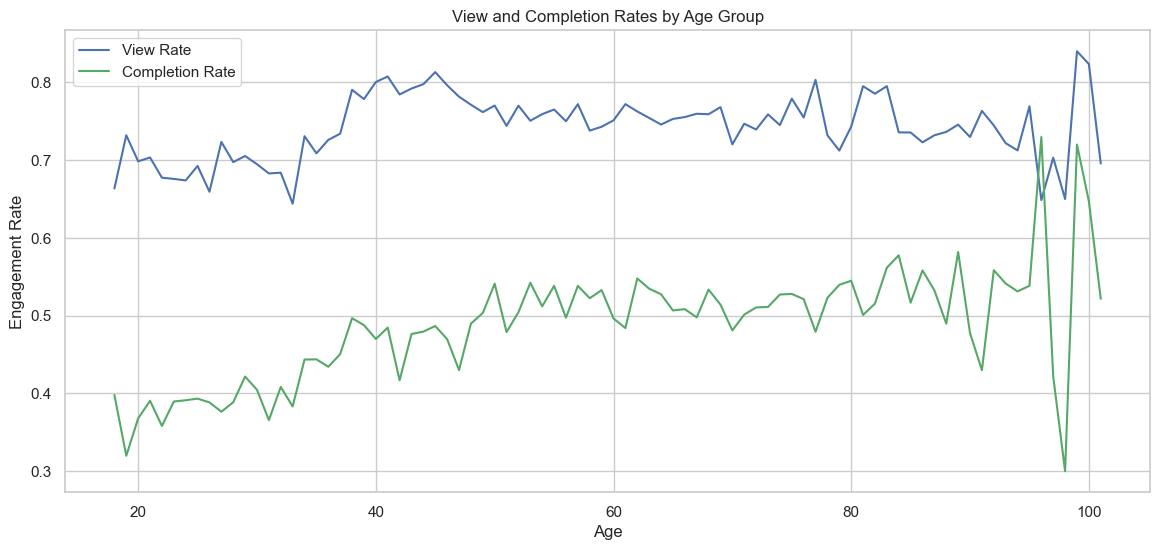

In [5]:
# Plot View and Completion Rates by Age Group
plt.figure(figsize=(14, 6))
sns.lineplot(x='age', y='view_rate', data=age_group_metrics, label='View Rate', color='b')
sns.lineplot(x='age', y='completion_rate', data=age_group_metrics, label='Completion Rate', color='g')
plt.title('View and Completion Rates by Age Group')
plt.xlabel('Age')
plt.ylabel('Engagement Rate')
plt.legend()
plt.show()

In [6]:

# Repeat for income group
income_group_metrics = final_merged_data.groupby('income/k').agg(
    total_received=('event_offer received', 'sum'),
    total_viewed=('event_offer viewed', 'sum'),
    total_completed=('event_offer completed', 'sum')
).reset_index()

income_group_metrics['view_rate'] = income_group_metrics['total_viewed'] / income_group_metrics['total_received']
income_group_metrics['completion_rate'] = income_group_metrics['total_completed'] / income_group_metrics['total_received']

income_group_metrics.head()

,income/k,total_received,total_viewed,total_completed,view_rate,completion_rate
0,30.0,396,262,120,0.661616,0.303030
1,31.0,996,685,347,0.687751,0.348394
2,32.0,1004,719,346,0.716135,0.344622
3,33.0,977,660,343,0.675537,0.351075
4,34.0,894,612,295,0.684564,0.329978


c:\Users\F88OAOA\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\F88OAOA\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\F88OAOA\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\F88OAOA\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

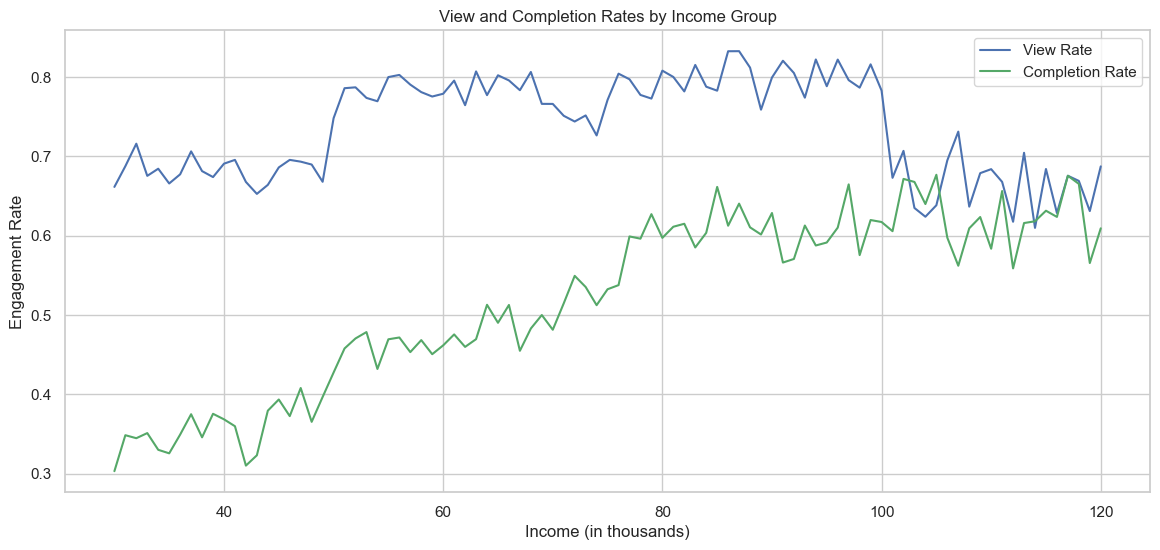

In [7]:
# Plot View and Completion Rates by Income Group
plt.figure(figsize=(14, 6))
sns.lineplot(x='income/k', y='view_rate', data=income_group_metrics, label='View Rate', color='b')
sns.lineplot(x='income/k', y='completion_rate', data=income_group_metrics, label='Completion Rate', color='g')
plt.title('View and Completion Rates by Income Group')
plt.xlabel('Income (in thousands)')
plt.ylabel('Engagement Rate')
plt.legend()
plt.show()

In [8]:

# Repeat for gender group
gender_group_metrics = final_merged_data.groupby(['gender_F', 'gender_M']).agg(
    total_received=('event_offer received', 'sum'),
    total_viewed=('event_offer viewed', 'sum'),
    total_completed=('event_offer completed', 'sum')
).reset_index()

# Create gender labels and calculate rates
gender_group_metrics['gender'] = gender_group_metrics.apply(
    lambda x: 'Female' if x['gender_F'] == 1 else 'Male' if x['gender_M'] == 1 else 'Other', axis=1
)
gender_group_metrics['view_rate'] = gender_group_metrics['total_viewed'] / gender_group_metrics['total_received']
gender_group_metrics['completion_rate'] = gender_group_metrics['total_completed'] / gender_group_metrics['total_received']

gender_group_metrics.head()

,gender_F,gender_M,total_received,total_viewed,total_completed,gender,view_rate,completion_rate
0,0.0,0.0,916,773,501,Other,0.843886,0.546943
1,0.0,1.0,38129,28301,16466,Male,0.742243,0.431850
2,1.0,0.0,27456,20786,15477,Female,0.757066,0.563702


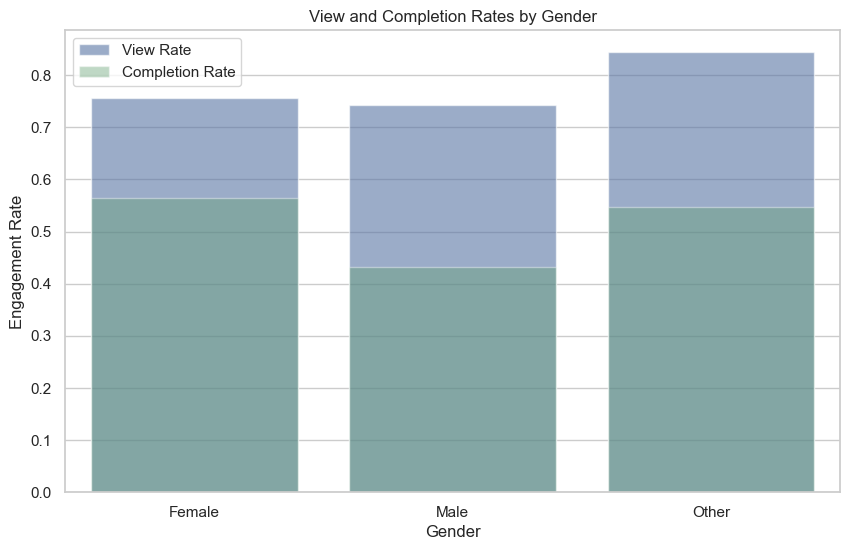

In [9]:
# Plot View and Completion Rates by Gender Group
plt.figure(figsize=(10, 6))

# Ensure the correct order for gender categories
gender_order = ['Female', 'Male', 'Other']

# Plot view and completion rates
sns.barplot(x='gender', y='view_rate', data=gender_group_metrics, order=gender_order, label='View Rate', color='b', alpha=0.6)
sns.barplot(x='gender', y='completion_rate', data=gender_group_metrics, order=gender_order, label='Completion Rate', color='g', alpha=0.4)

# Set plot details
plt.title('View and Completion Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Engagement Rate')
plt.legend()
plt.show()


#### **Key Findings and Insights**:

1. **Age Group Engagement**:
   - **View Rate**: Across different age groups, the **view rate** remains relatively consistent, averaging around **75-80%**. Older age groups (e.g., above 60 years) tend to maintain a higher view rate, peaking at close to **85%**.
   - **Completion Rate**: The **completion rate** shows a gradual increase with age, from about **30-35%** in younger individuals to around **50%** in older individuals. This indicates that older individuals are more likely to complete offers they view compared to younger users.
   - **Insight**: Older age groups tend to be more consistent in both viewing and completing offers, suggesting that they may find offers more relevant or beneficial compared to younger users. Targeting offers specifically to older demographics might result in higher completion rates.

2. **Income Group Engagement**:
   - **View Rate**: The **view rate** increases steadily with income, reaching above **80%** for individuals earning above **100k**. This suggests that higher-income individuals are more likely to engage with the offer initially.
   - **Completion Rate**: The **completion rate** also increases as income rises, indicating a direct correlation between income level and the likelihood of completing offers. The completion rate for high-income groups (above **80k**) averages around **60-65%**.
   - **Insight**: Higher-income individuals tend to have both a higher view rate and a higher completion rate. This suggests that offers may be particularly appealing to wealthier users, potentially because they have more disposable income or find the offers more relevant. Thus, creating more exclusive or higher-value offers may further increase engagement from these groups.

3. **Gender Group Engagement**:
   - **View Rate** and **Completion Rate**:
     - The **view rate** is similar across **Female**, **Male**, and **Other** gender categories, with values ranging from **70-80%**.
     - The **completion rate** also remains similar across genders, with **completion rates** consistently around **50-60%**.
   - **Insight**: The similarity in both **view** and **completion rates** across all gender categories (Female, Male, Other) indicates that offers are equally appealing across genders. This suggests that current marketing and offers do not require gender-specific targeting to drive higher engagement, making gender-neutral campaigns a viable strategy.

#### **Overall Insights**:

- **Age and Income Impact**: Both **age** and **income** appear to have a noticeable impact on offer engagement. Older individuals and those with higher incomes are generally more likely to view and complete offers. Offers that cater to their preferences and motivations could further enhance completion rates.
- **Gender Neutrality**: There are no significant differences in engagement between **males**, **females** and **other**, suggesting that offers are equally attractive across gender groups. This indicates that current marketing strategies are well-balanced for all genders.

These findings provide valuable insights that can be used to **optimize marketing strategies** and **target specific segments** more effectively, potentially increasing the overall completion rate of offers.


## Response Rates by Demographics

Understand which demographic groups respond best to each type of offer.

In [10]:
def res_rate_by_demographic(demographic_data, demo_cols):
    """
    Calculate and visualize response rates by demographic.

    Parameters:
    - demographic_data: DataFrame containing the relevant columns.
    - demo_cols: List of demographic columns (e.g., ['age_category'], ['income_category'], ['gender_F', 'gender_M']).
    """

    # Define offer type columns and event columns
    offer_type_cols = ["offer_type_bogo", "offer_type_discount"]

    # Step 1: Group by Demographic Columns and Offer Type Columns
    offer_response = (
        demographic_data.groupby(demo_cols + offer_type_cols)
        .agg(
            total_received=("event_offer received", "sum"),
            total_viewed=("event_offer viewed", "sum"),
            total_completed=("event_offer completed", "sum"),
        )
        .reset_index()
    )

    # Step 2: Identify Offer Type Labels
    offer_response["offer_type"] = offer_response.apply(
        lambda row: (
            "BOGO"
            if row["offer_type_bogo"] == 1
            else "Discount" if row["offer_type_discount"] == 1 else "Informational"
        ),
        axis=1,
    )

    # Step 3: Calculate View and Completion Rates
    offer_response["view_rate"] = (
        offer_response["total_viewed"] / offer_response["total_received"]
    )
    offer_response["completion_rate"] = (
        offer_response["total_completed"] / offer_response["total_received"]
    )

    # Step 4: Handle Gender Case for Labels
    if "gender_F" in demo_cols and "gender_M" in demo_cols:
        offer_response["gender"] = offer_response.apply(
            lambda row: (
                "Female"
                if row["gender_F"] == 1
                else "Male" if row["gender_M"] == 1 else "Other"
            ),
            axis=1,
        )
        demo_label = "gender"
        offer_response[demo_label] = offer_response["gender"]
    else:
        demo_label = demo_cols[0]

    # Step 5: Create Visualizations
    # Define order for age and income categories
    if demo_label == "age_category":
        category_order = ["Youth", "Young Adult", "Adult", "Senior"]
    elif demo_label == "income_category":
        category_order = sorted(
            offer_response[demo_label].unique(), key=lambda x: int(x.split("k")[0])
        )
    else:
        category_order = None

    # Define a custom palette with green shades
    green_palette = ["#66c2a5", "#3288bd", "#99d594", "#00441b", "#41ab5d"]
    # View Rates by Demographic and Offer Type
    plt.figure(figsize=(14, 6))
    sns.barplot(
        x=demo_label,
        y="view_rate",
        hue="offer_type",
        data=offer_response,
        palette=green_palette,
        order=category_order,
    )
    plt.title(f"View Rates by {demo_label.capitalize()} and Offer Type")
    plt.xlabel(demo_label.capitalize())
    plt.ylabel("View Rate")
    plt.legend(title="Offer Type")
    plt.xticks(rotation=45)
    plt.show()

    # Completion Rates by Demographic and Offer Type
    plt.figure(figsize=(14, 6))
    sns.barplot(
        x=demo_label,
        y="completion_rate",
        hue="offer_type",
        data=offer_response,
        palette=green_palette,
        order=category_order,
        color="green",
    )
    plt.title(f"Completion Rates by {demo_label.capitalize()} and Offer Type")
    plt.xlabel(demo_label.capitalize())
    plt.ylabel("Completion Rate")
    plt.legend(title="Offer Type")
    plt.xticks(rotation=45)
    plt.show()

    return offer_response

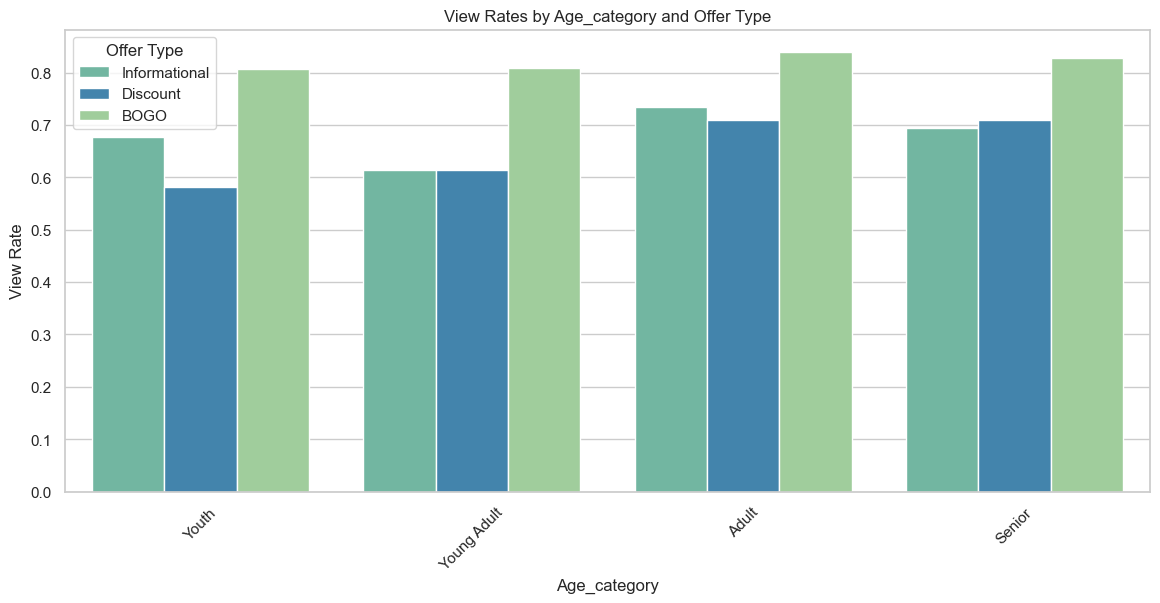

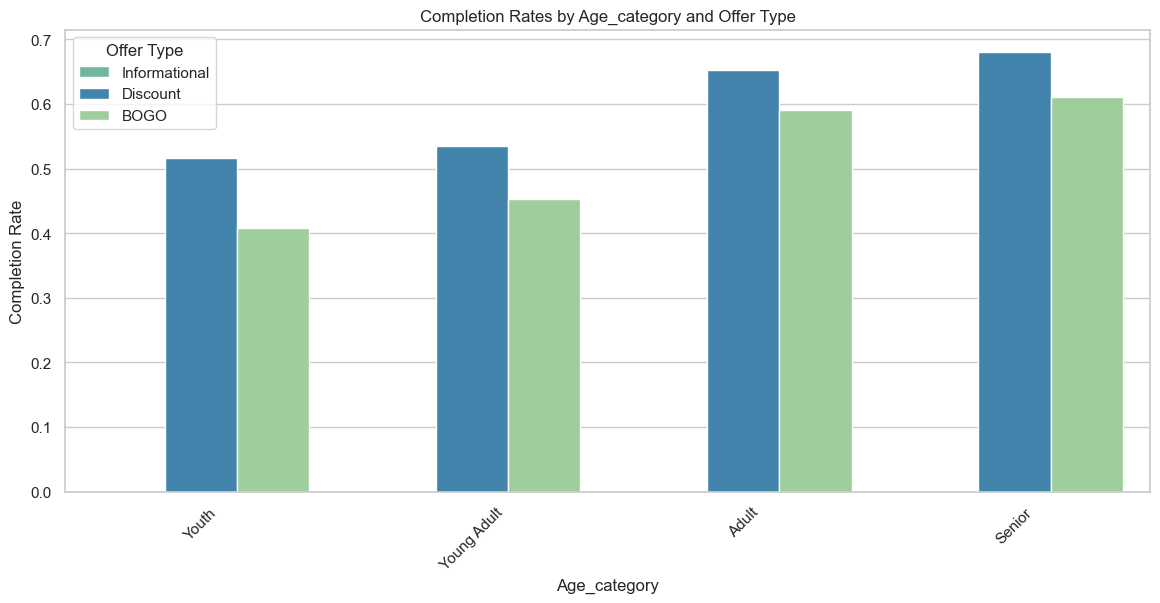

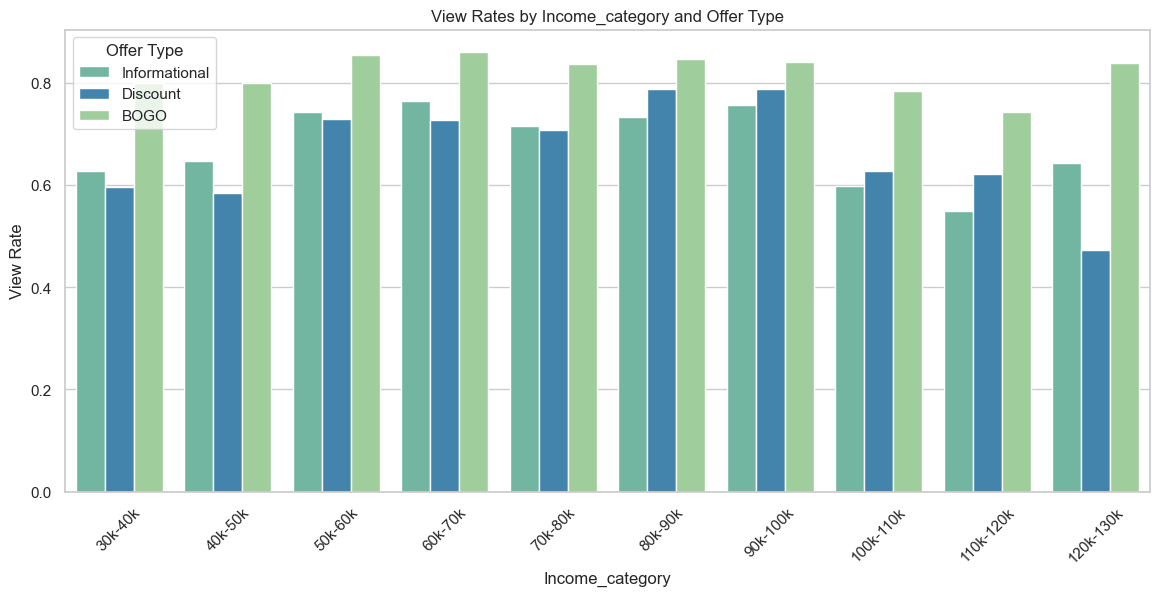

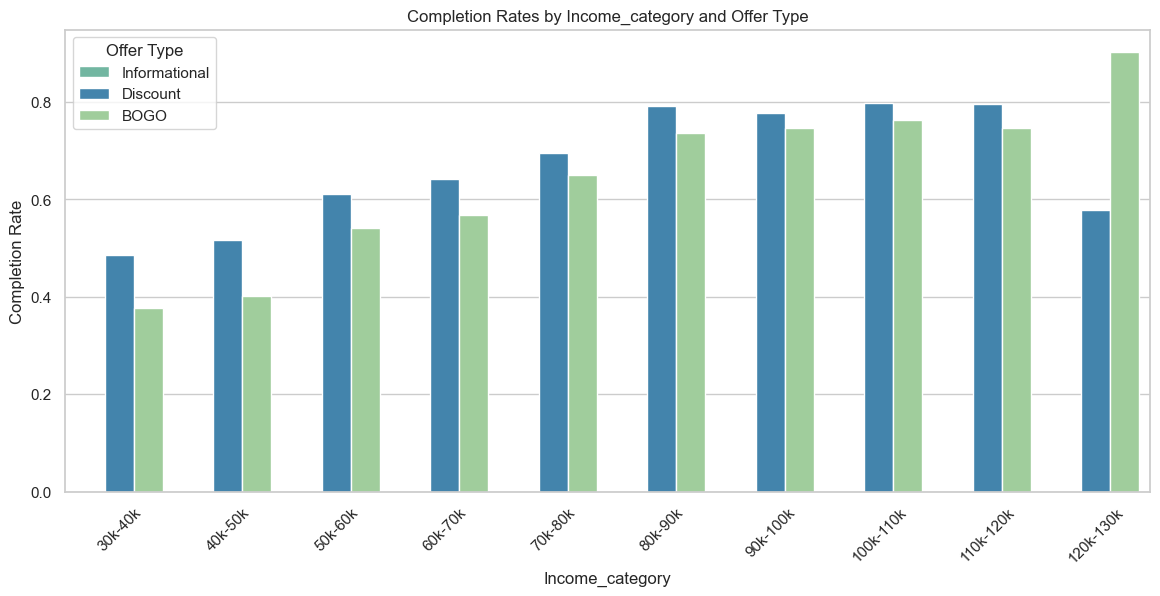

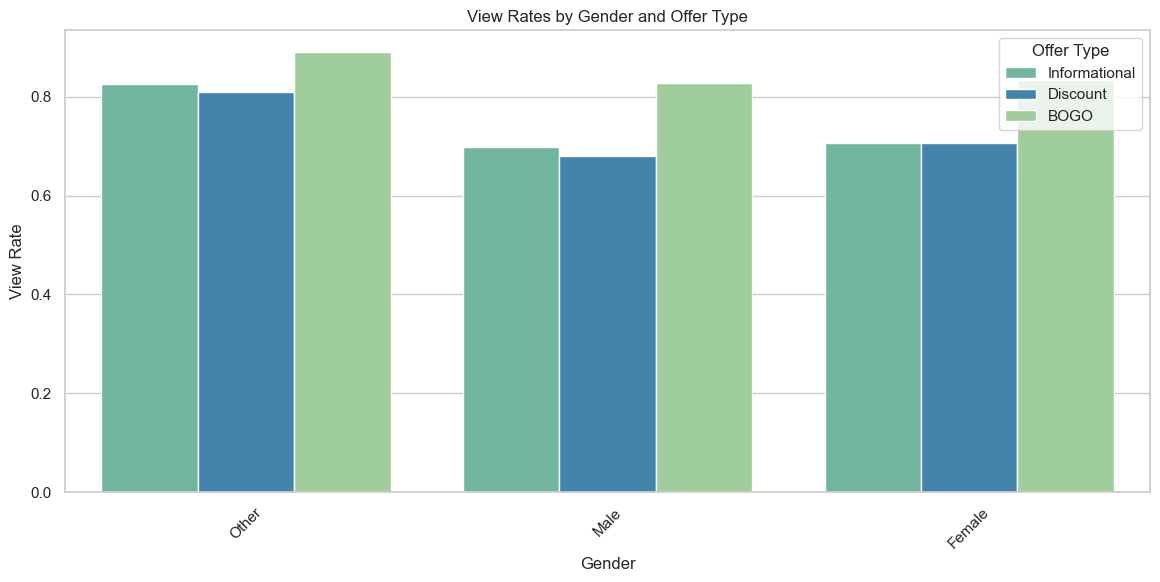

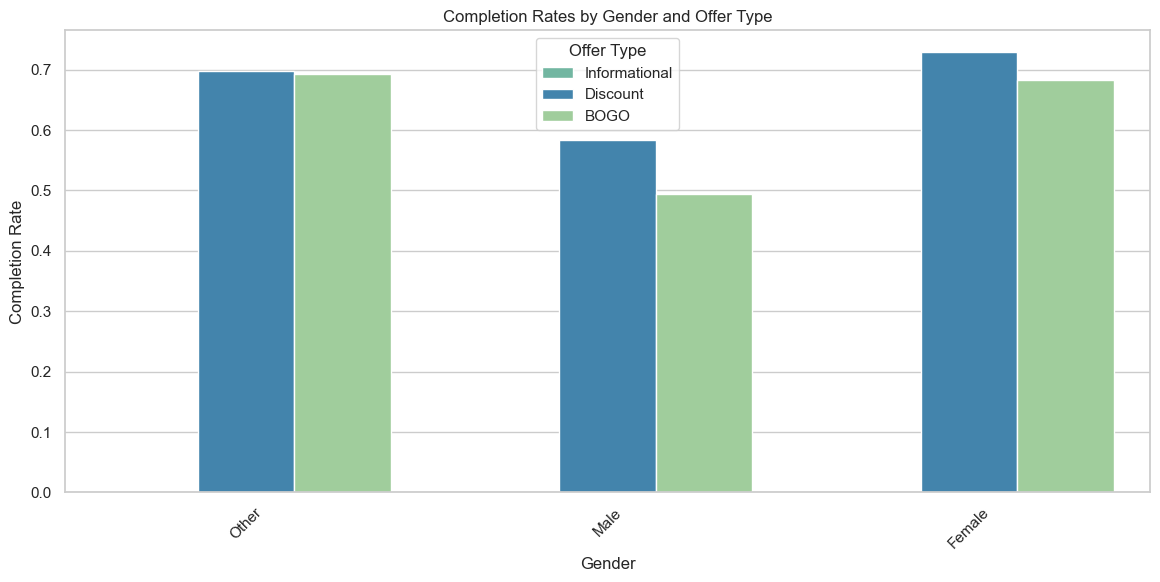

In [11]:
# Merge profile and transcript data
demographic_offer_data = final_merged_data.copy()

# fo a better overview lets categorize age and income

# Define functions to categorize age and income
def categorize_age(age):
    if age < 25:
        return 'Youth'
    elif 25 <= age < 35:
        return 'Young Adult'
    elif 35 <= age < 60:
        return 'Adult'
    else:
        return 'Senior'

def categorize_income(income):
    return f'{int(income // 10 * 10)}k-{int((income // 10 + 1) * 10)}k'

# Apply categorization functions to demographic_offer_data
demographic_offer_data['age_category'] = demographic_offer_data['age'].apply(categorize_age)
demographic_offer_data['income_category'] = demographic_offer_data['income/k'].apply(categorize_income)

# Calculate view and completion rates by demographics for different offer types
# For each demographic (age, income,gender), calculate rates for each offer type (BOGO, Discount, Informational)

age_offer_response = res_rate_by_demographic(
    demographic_data=demographic_offer_data,
    demo_cols=['age_category']
)

income_offer_response = res_rate_by_demographic(
    demographic_data=demographic_offer_data,
    demo_cols=['income_category']
)

gender_offer_response = res_rate_by_demographic(
    demographic_data=demographic_offer_data,
    demo_cols=['gender_F', 'gender_M']
)



#### Analysis for **Response Rates by Demographics**:

1. **Age Group**:
    - **View Rate**:
        - **BOGO Offers** are generally viewed at the highest rate across all age groups, particularly among **Adults** and **Seniors**.
        - **Informational Offers** are viewed significantly less by **Youth**, but have comparable view rates among **Adults** and **Seniors**.
    - **Completion Rate**:
        - **Discount Offers** tend to have the highest completion rates across age groups, especially among **Adults** and **Seniors**.
        - **BOGO Offers** have lower completion rates compared to **Discount Offers**, though still substantial among **Seniors**.
        - **Youth** tend to have lower completion rates overall, which may indicate less interest or fewer opportunities to take full advantage of offers.

    **Insight**: **Adults** and **Seniors** are most engaged with offers, especially **Discount Offers**. Designing more targeted campaigns for these age groups with discount-based incentives could further enhance completion rates.

2. **Income Group**:
    - **View Rate**:
        - Across income groups, **BOGO Offers** generally have the highest view rates, especially for income brackets above **80k**.
        - **Discount Offers** have consistent view rates, but **Informational Offers** tend to have lower engagement, particularly in higher income categories.
    - **Completion Rate**:
        - **Discount Offers** show a steady increase in completion rates as income levels rise, reaching the highest levels at income brackets **90k+**.
        - **BOGO Offers** also see increased completion rates in higher income groups, but do not surpass **Discount Offers**.
        - **Informational Offers** have the lowest completion rates across all income brackets, suggesting they are less motivating in driving user action.

    **Insight**: Higher income individuals are most responsive to **Discount Offers**, both in terms of viewing and completing them. Tailoring offers with greater monetary rewards and exclusivity could help maximize engagement in this group.

3. **Gender Group**:
    - **View Rate**:
        - **BOGO Offers** are viewed at the highest rate across **Male**, **Female**, and **Other** genders, with relatively consistent results across genders.
        - **Informational Offers** have similar view rates to **Discount Offers** for **Female** users, while **Male** users tend to view **Discount Offers** more.
    - **Completion Rate**:
        - **Discount Offers** have the highest completion rates across all gender categories, followed closely by **BOGO Offers**.
        - Interestingly, users in the **Other** category show a slightly higher engagement for both **Discount** and **BOGO Offers**, suggesting a unique opportunity for targeted campaigns in this group.

    **Insight**: There is no significant difference in gender-based engagement with offers. However, the **Other** gender group shows slightly higher engagement rates, which may present an opportunity for more personalized marketing campaigns to further increase offer completion.

#### Overall Insights:
- **Offer Types**:
    - **BOGO Offers** are effective at driving **view rates** but less successful at leading to **completion** compared to **Discount Offers**.
    - **Discount Offers** have the highest **completion rates** across demographics, suggesting that people value the immediate benefit offered by discounts.
    - **Informational Offers** have generally lower engagement, both in terms of **views** and **completion**, across all demographic groups.

- **Target Groups for Optimization**:
    - **Adults** and **Seniors** are most responsive to both **BOGO** and **Discount Offers**, particularly in higher income brackets. Designing offers that cater to their preferences, such as greater discounts or longer validity periods, could increase completion rates further.
    - **Higher-income individuals** tend to engage more with offers, making them ideal candidates for exclusive, high-reward campaigns.
    - The **Other** gender group shows potential for increased engagement with more personalized offers.
